In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
mimic_iv_path = "/cis/home/charr165/Documents/physionet.org/mimiciv/2.2"
mm_dir = "/cis/home/charr165/Documents/multimodal"

output_dir = os.path.join(mm_dir, "preprocessing")


In [22]:
ireg_vitals_ts_df = pd.read_pickle(os.path.join(output_dir, "ts_labs_vitals_icu.pkl"))
ireg_vitals_ts_df = ireg_vitals_ts_df[ireg_vitals_ts_df['timedelta'] > 0]

In [23]:
labs_cols = ['Absolute Neutrophil Count', 'Alkaline Phosphate', 'Anion gap',
       'Bicarbonate', 'Calcium', 'Chloride', 'Creatinine', 
       'Glucose',  'Hematocrit', 'Hemoglobin',
        'Magnesium',  
       'Platelet Count', 'Potassium',  'Sodium',
        'Urea Nitrogen', 'Vancomycin', 'WBC',
       'Weight']

vitals_cols = [
    'Diastolic BP',
       'GCS - Eye Opening', 'GCS - Motor Response', 'GCS - Verbal Response',
'Inspired O2 Fraction', 'Mean BP', 'O2 Saturation','Respiratory Rate',
'Systolic BP', 'Temperature', 'Weight', 'Heart Rate', 'PH'
]

In [38]:
unique_stay_ids = ireg_vitals_ts_df['stay_id'].unique()

# Randomly sample a single stay
curr_stay_id = np.random.choice(unique_stay_ids)

curr_stay = ireg_vitals_ts_df[ireg_vitals_ts_df['stay_id'] == curr_stay_id].copy()

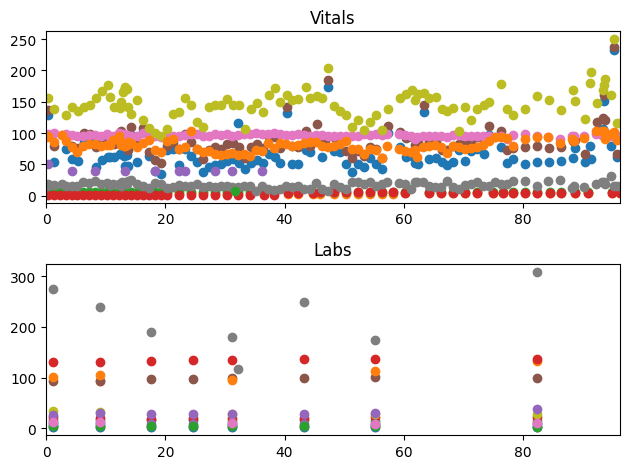

In [39]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

# Assuming vitals_cols and labs_cols are lists of column names
# and each column is a separate vital sign or lab test

min_time = 0
max_time = curr_stay['timedelta'].max()

# Plot vitals in the first subplot
for col in vitals_cols:
    axs[0].scatter(curr_stay['timedelta'], curr_stay[col], label=col)
axs[0].set_title('Vitals')
# axs[0].legend()

# Plot labs in the second subplot
for col in labs_cols:
    axs[1].scatter(curr_stay['timedelta'], curr_stay[col], label=col)
axs[1].set_title('Labs')
# axs[1].legend()

# Set the x-axis limits to be the same for both subplots
axs[0].set_xlim(min_time, max_time)
axs[1].set_xlim(min_time, max_time)

plt.tight_layout()
plt.show()